In [60]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
SELECT date 
FROM measurement
order by date desc
limit 1


select max(date)
from measurement


('2017-08-23',)

In [9]:
# orm way
session.query(func.max(measurement.date)).all()


[('2017-08-23',)]

In [10]:
session.query(func.max(measurement.date)).first()

('2017-08-23',)

In [13]:
last_date_str = session.query(func.max(measurement.date)).scalar()

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_before = dt.date.fromisoformat(last_date_str) - dt.timedelta(days=365)
year_before

datetime.date(2016, 8, 23)

In [57]:
# Perform a query to retrieve the date and precipitation scores
# date_prcp_avg = session.query(measurement.date, func.avg(measurement.prcp))\
#                     .filter(measurement.date>=year_before)\
#                     .group_by(measurement.date)\
#                     .order_by(measurement.date)\
#                     .all()


date_prcp_avg = session.query(measurement.date, measurement.prcp)\
                    .filter(measurement.date>=year_before)\
                    .order_by(measurement.date)\
                    .all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
query_df = pd.DataFrame(date_prcp_avg, columns=["date", "precipitation"])
query_df
# Sort the dataframe by date

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02
...,...,...
2225,2017-08-22,0.50
2226,2017-08-23,0.00
2227,2017-08-23,0.00
2228,2017-08-23,0.08


<Axes: ylabel='Inches'>

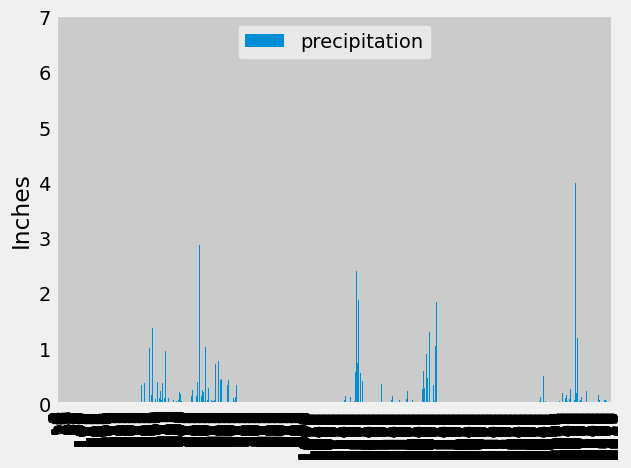

In [63]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = query_df.plot(kind="bar" ,ylabel='Inches')
ax
# https://stackoverflow.com/questions/39714724/how-to-change-the-x-axis-tick-frequency-of-pandas-plot
# ax.xaxis.set_major_locator(mdates.MonthLocator())
# plt.show()

In [59]:
# Use Pandas to calculate the summary statistics for the precipitation data
query_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [70]:
# Design a query to calculate the total number of stations in the dataset
session.query(station.station).count()

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
for row in session.query(measurment.station, )

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 4.183333333333314, 'Temperature')

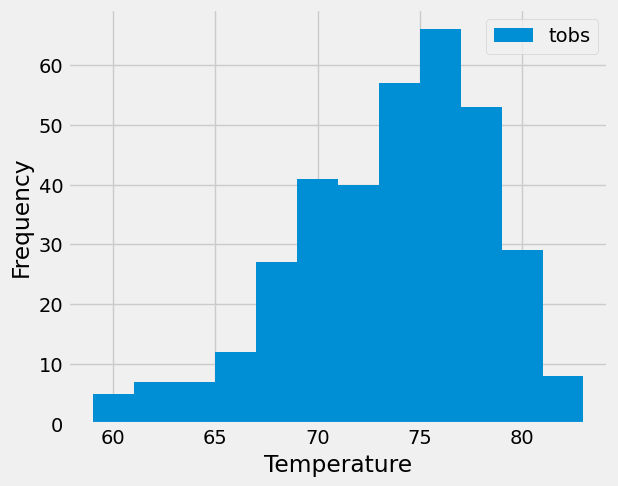

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()